## Import required libraries :

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

## Dataset Overview :

In [2]:
county_df = pd.read_csv('/Users/chandrakanth/neuefischer/2020-ds-Project-EDA/King_County_House_prices_dataset.csv')
county_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


## Assumptions :

#### - Houses are at or near to the water front
#### - kept in good condition
#### - have good grade from the county 
#### - Houses are in the city center
#### - The term "expensive" applies to today's value perhaps 

## Data analysis and cleaning :

#### - From the data we know that avg price of the house is 540000 dollars and maximum is 7,700,000 dollars
#### - By analysing we found 2 string objects in Dataset, we convert sqft_basement to numeric leave other as string 
#### - There are missing values in waterfront, view, yr_renovated and sqft_basement
#### - Assume all Nan values are assumed to be zero and replaced.

In [3]:
county_df.sqft_basement = pd.to_numeric(county_df.sqft_basement, errors='coerce')

In [4]:
county_df['waterfront']= county_df['waterfront'].fillna(0)

In [5]:
county_df['view'] = county_df['view'].fillna(0)

In [6]:
county_df['yr_renovated'] = county_df['yr_renovated'].fillna(0)

###  selected Features vs Price graphical overview :

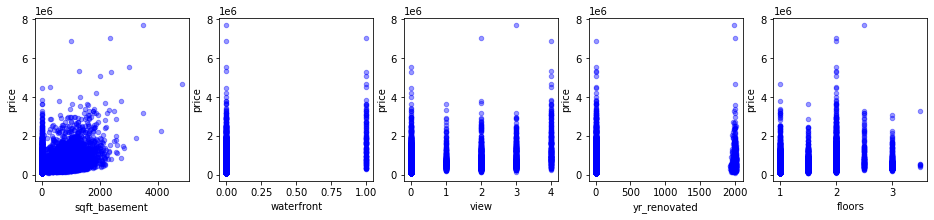

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['sqft_basement', 'waterfront', 'view', 'yr_renovated','floors'], axes):
    county_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

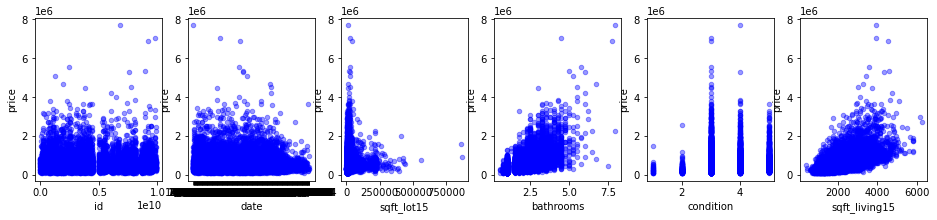

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))

for xcol, ax in zip(['id', 'date', 'sqft_lot15', 'bathrooms','condition','sqft_living15'], axes):
    county_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [9]:
county_df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.117855
floors           0.256804
waterfront       0.264306
lat              0.306692
bedrooms         0.308787
sqft_basement    0.325008
view             0.393497
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

### what we conclude :

#### - With above graphs and corelation values, we can drop certain columns having low corelation value to price
#### - We also keep floors and condition as they seems to show some kind of relationship with price and demand

In [10]:
cleaned_county_df = county_df.drop(['id','date', 'waterfront', 'view','yr_renovated', 'sqft_lot15','zipcode'], axis=1)

In [11]:
cleaned_county_df['sqft_basement'] = pd.to_numeric(cleaned_county_df.sqft_basement, errors='coerce')

In [12]:
cleaned_county_df.sqft_basement= cleaned_county_df.sqft_basement.fillna(0)

In [13]:
cleaned_county_df['sqft_basement']= cleaned_county_df['sqft_basement'].astype(int)

In [14]:
cleaned_county_df['floors']= cleaned_county_df['floors'].astype(int)

In [15]:
cleaned_county_df.rename(columns={'bedrooms' : 'number_of_bedrooms', 'sqft_living' : 'total_living_area_sqft','condition':'house_condition',
                         'sqft_lot' : 'lot_area_sqft', 'grade' :'housing_grade', 'sqft_above' : 'living_area_without_basement_sqft',
                          'sqft_basement' : 'basement_area_sqft','lat':'latitude', 'long' :'longitude',
                          'bathrooms':'numberofbathrooms_per_house'}, inplace = True)

###  Checking for corelation among explanatory variables :

#### - Heatmap 

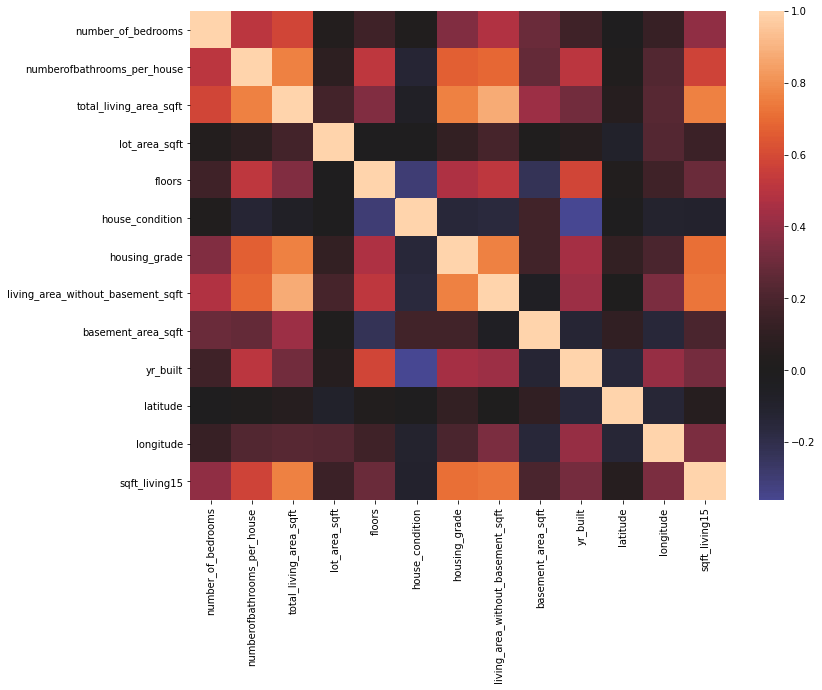

In [16]:
plt.figure(figsize=(12, 9))
x_var = cleaned_county_df.drop('price', axis=1)
sns.heatmap(x_var.corr(), center=0);

#### - Corelation Matrix 

In [17]:
abs(x_var.corr()) > 0.85

,number_of_bedrooms,numberofbathrooms_per_house,total_living_area_sqft,lot_area_sqft,floors,house_condition,housing_grade,living_area_without_basement_sqft,basement_area_sqft,yr_built,latitude,longitude,sqft_living15
number_of_bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False
numberofbathrooms_per_house,False,True,False,False,False,False,False,False,False,False,False,False,False
total_living_area_sqft,False,False,True,False,False,False,False,True,False,False,False,False,False
lot_area_sqft,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False
house_condition,False,False,False,False,False,True,False,False,False,False,False,False,False
housing_grade,False,False,False,False,False,False,True,False,False,False,False,False,False
living_area_without_basement_sqft,False,False,True,False,False,False,False,True,False,False,False,False,False
basement_area_sqft,False,False,False,False,False,False,False,False,True,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False


### What we know :

#### - From above matrix that 'Living_area_without_basement_sqft' and 'Total_living_area_sqft' are highly corelated.
#### - We drop one of those columms to avoid multicollinearity problems in our regression model 

In [18]:
cleaned_county_df.drop('living_area_without_basement_sqft', axis=1, inplace=True)

### Checking for outliers :

#### - Price distribution and Boxplots 

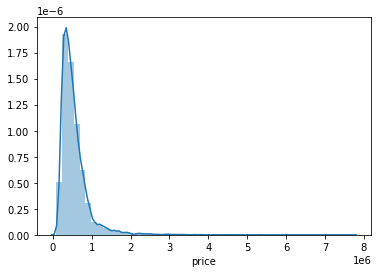

In [19]:
sns.distplot(cleaned_county_df.price);

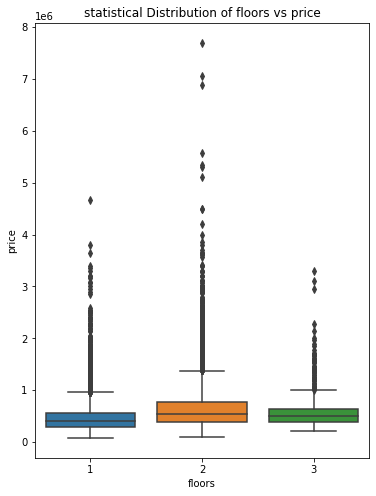

In [20]:
plt.figure(figsize=(6,8))
sns.boxplot(x= cleaned_county_df.floors, y= cleaned_county_df.price)
plt.title("statistical Distribution of floors vs price")
plt.show();

### Conclusion :

#### - Analysis of the data in normal range is difficult with so many outliers
#### - So we remove the outliers

In [21]:
# removing outliers
cleaned_county_df = cleaned_county_df[(np.abs(stats.zscore(cleaned_county_df.price)) < 3)]

### Grpahical overview without price outliers :

#### - Boxplot Floors Vs Price 

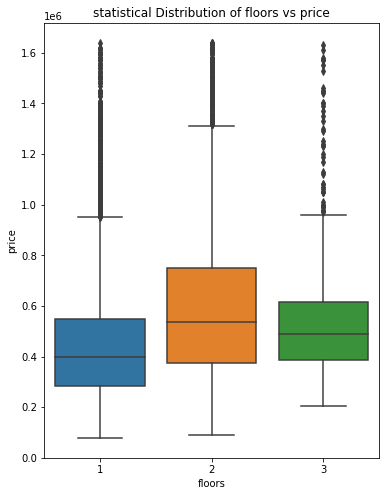

In [22]:
plt.figure(figsize=(6,8))
sns.boxplot(x= cleaned_county_df.floors, y= cleaned_county_df.price)
plt.title("statistical Distribution of floors vs price")
plt.show();

#### - Normalised graphical price distribution 

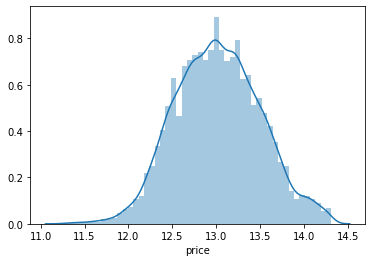

In [23]:
cleaned_county_df.price = np.log(cleaned_county_df.price)
sns.distplot(cleaned_county_df.price);

## Price distribution overview withrepect to certain features :
#### - Impact of Total Area in square feet on price

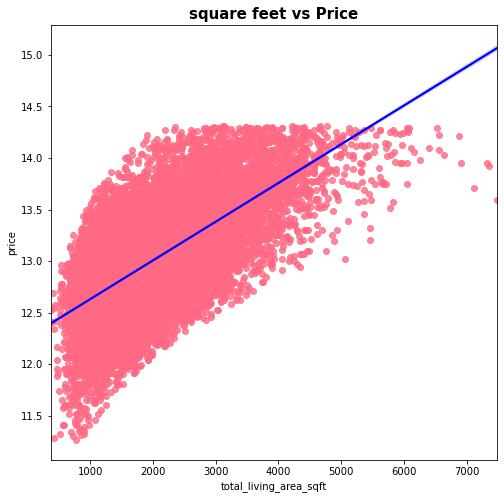

In [28]:
plt.figure(figsize=(8,8))
sns.regplot(x='total_living_area_sqft', y='price', data=cleaned_county_df, color='#FF6984', line_kws={'color':'blue'})
plt.title("square feet vs Price", fontsize=15, fontweight='bold')
plt.show()

#### - Impact of Housing grade on the price

<Figure size 1080x864 with 0 Axes>

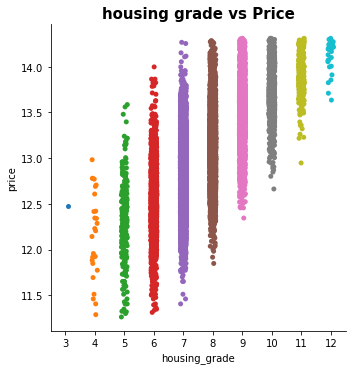

In [25]:
plt.figure(figsize=(15,12));
sns.catplot(x='housing_grade', y='price', data=cleaned_county_df);
plt.title("housing grade vs Price", fontsize=15, fontweight='bold');
plt.show();

#### - Impact of Housing condition on the price

<Figure size 1080x720 with 0 Axes>

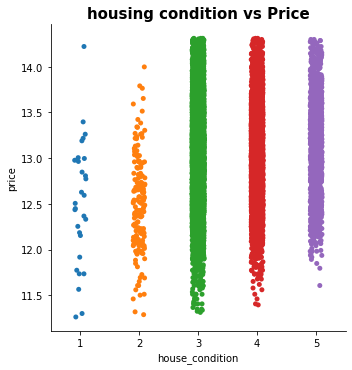

In [26]:
plt.figure(figsize=(15,10))
sns.catplot(x='house_condition', y='price', data=cleaned_county_df)
plt.title("housing condition vs Price", fontsize=15, fontweight='bold')
plt.show()

####  Housing Price distribution across the county

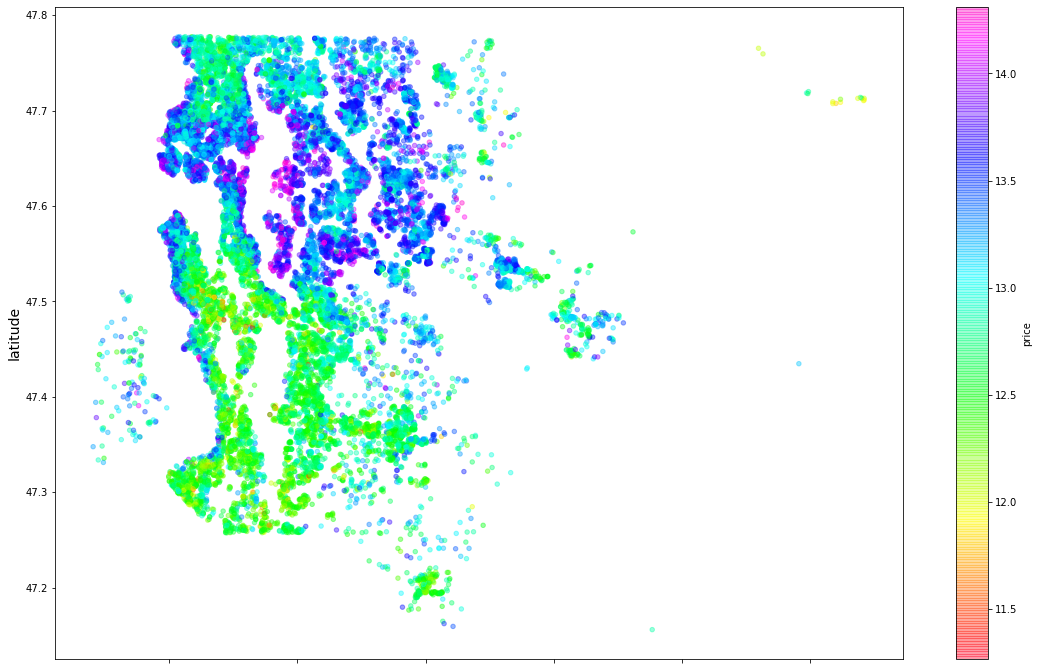

In [27]:
cleaned_county_df.plot(kind="scatter", x="longitude", y="latitude", c="price",
                   cmap = plt.get_cmap("gist_rainbow"), colorbar=True,
                       alpha=0.4, figsize=(19,12))
plt.ylabel("latitude", fontsize=14)
plt.xlabel("longitude", fontsize=14)
plt.show()

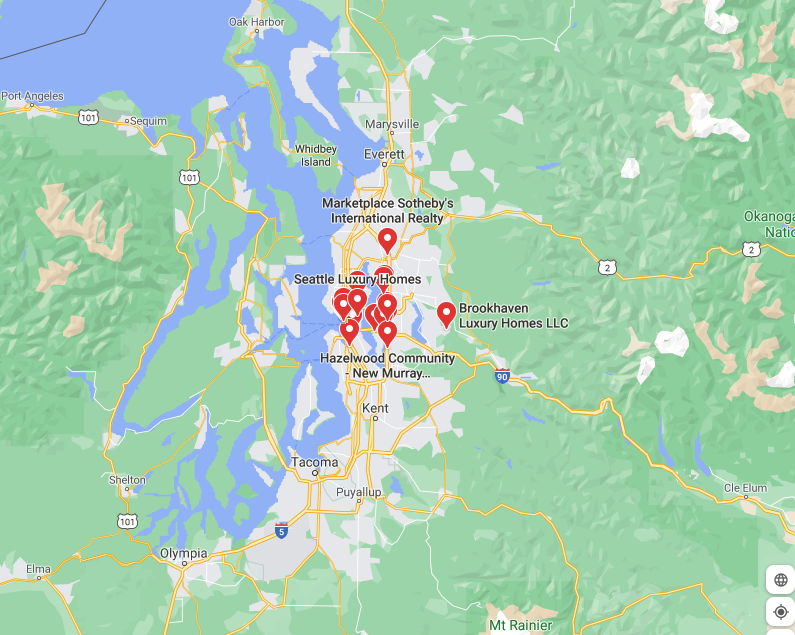

## Conclusion :

#### - We can see that the houses located in north east of the king county have a higher sales price
#### - Very expensive houses with price above avg. price are around 40 % sold in 2 years
#### - Demand seems to be there, might take more time to sell depending on avg income of the population(No income data)
#### - Confirmed by our correlation Matrix and internet information on expensive place in king county
#### - Our assumption of waterfront is not necessarily correct